In [ ]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog
import matplotlib.pyplot as plt
import numpy as np
import time
import json
from espn_api.basketball import League

Let's get a list of players from my ESPN fantasy league.

First, let's create our ```league``` object by importing the keys required.

In [2]:
with open('keys.json', 'r') as file:
	keys = json.load(file)
league = League(keys['basketball']['leagueID'], 2024, keys['espnS2'], keys['swid'])
print(league)

League(703222169, 2024)


Then, let's go through all of the teams and create a list of players.

In [3]:
allPlayers = []
for team in league.teams:
	for player in team.roster:
		allPlayers.append(player.name)

Let's find the NBA Stats playerID for each of the players in our roster.

In [4]:
playerIDs = []
for player in allPlayers:
	search = players.find_players_by_full_name(player)
	while len(search) == 0:
		player = player[:-1]
		search = players.find_players_by_full_name(player)
	playerInfo = search[0]
	playerIDs.append(playerInfo['id'])
print(allPlayers)

['Luka Doncic', 'LeBron James', 'Bam Adebayo', 'Donovan Mitchell', 'Pascal Siakam', 'Paul George', 'Fred VanVleet', 'Franz Wagner', 'Derrick White', "D'Angelo Russell", 'Daniel Gafford', 'Bradley Beal', 'Draymond Green', 'Shai Gilgeous-Alexander', 'Anthony Edwards', 'Jalen Brunson', 'Lauri Markkanen', 'Jaren Jackson Jr.', 'Jaylen Brown', 'Cade Cunningham', 'Brandon Ingram', 'Scoot Henderson', 'Deandre Ayton', 'Jarrett Allen', 'Khris Middleton', 'Kevin Huerter', 'Giannis Antetokounmpo', 'Victor Wembanyama', 'Anthony Davis', 'Jrue Holiday', 'Michael Porter Jr.', 'Tyler Herro', 'Jusuf Nurkic', 'Tyus Jones', 'Evan Mobley', 'Myles Turner', 'Mikal Bridges', 'Bogdan Bogdanovic', 'Scottie Barnes', 'Joel Embiid', 'Stephen Curry', 'Kevin Durant', 'Zion Williamson', 'Kristaps Porzingis', 'Chet Holmgren', "De'Aaron Fox", 'Jamal Murray', 'CJ McCollum', 'Terry Rozier', 'Anfernee Simons', 'Ivica Zubac', 'Immanuel Quickley', 'Jordan Poole', 'Tyrese Haliburton', 'Devin Booker', 'Kyrie Irving', 'Tyrese 

We're now going to find total fantasy point production for the 2023-24 season.

In [8]:
pointsData = {}
for i, id in enumerate(playerIDs):
	time.sleep(3.5)
	gameLog = playergamelog.PlayerGameLog(player_id=id, season='2023-24').get_dict()
	fantasyPoints = []
	for game in reversed(gameLog['resultSets'][0]['rowSet']):
		fieldGoalsMade = 2 * game[7]
		fieldGoalsAttempted = -1 * game[8]
		threePointersMade = game[10]
		freeThrowsMade = game[13]
		freeThrowsAttempted = -1 * game[14]
		rebounds = game[18]
		assists = 2 * game[19]
		steals = 4 * game[20]
		blocks = 4 * game[21]
		turnovers = -2 * game[22]
		points = game[24]
		fantasyPoints.append(
			fieldGoalsMade + fieldGoalsAttempted +
			freeThrowsMade + freeThrowsAttempted +
			threePointersMade +
			rebounds + assists +
			steals + blocks +
			turnovers +
			points
		)
	pointsData[allPlayers[i]] = sum(fantasyPoints)



Now, let's get the total fantasy points earned by a player throughout the 2023-34 season and compare it.

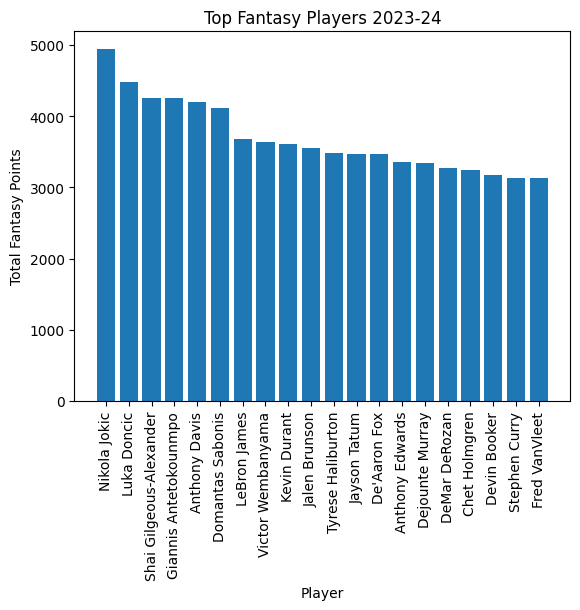

In [17]:
sortedPoints = dict(sorted(pointsData.items(), key=lambda x: x[1], reverse=True))
plt.bar(list(sortedPoints.keys())[:20], list(sortedPoints.values())[:20])
plt.title("Top Fantasy Players 2023-24")
plt.ylabel("Total Fantasy Points")
plt.xlabel("Player")
plt.xticks(rotation=90)
plt.show()